In [1]:
using Judyp, Plots

## Problem 1

In [2]:
include("problem1.jl")

getproblem1 (generic function with 2 methods)

In [3]:
p1 = getproblem1()

Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [1.0, 100.0]
    State 2: 10 nodes over [1.0, 100.0]
  2 choice variables
    Choice 1: bounds [0.0, 1.0] with initial value 0.5
    Choice 2: bounds [0.0, 1.0] with initial value 0.5
  0 constraints
  0 uncertain parameters


In [4]:
res1 = solve(p1)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Function iteration converged after 366 iterations with max. coefficient difference of 0.0009931651847807643


Dynamic programming solution

In [5]:
simres1 = simulate(res1, 50);

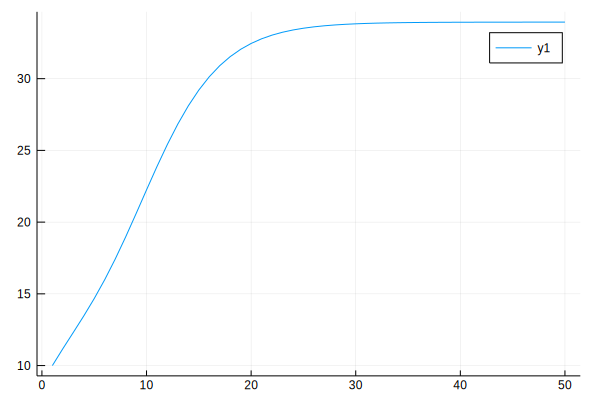

In [6]:
plot(simres1.state_vars[1][1,:])

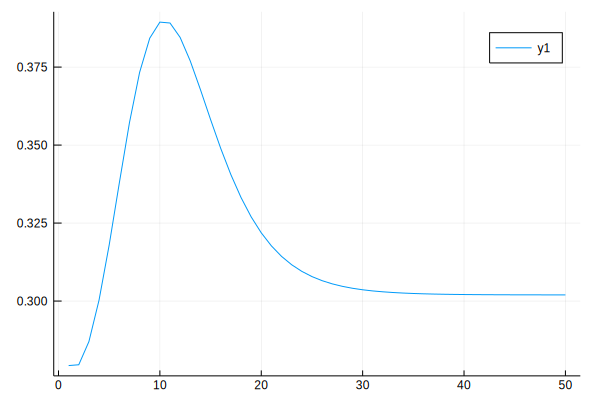

In [7]:
plot(simres1.choice_vars[1][1,:])

## Problem 2

In [8]:
include("problem2.jl")

getproblem2 (generic function with 2 methods)

In [9]:
p2 = getproblem2()

Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [1.0, 100.0]
    State 2: 10 nodes over [1.0, 100.0]
  4 choice variables
    Choice 1: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 2: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 3: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 4: bounds [0.0, 1.0e11] with initial value 0.1
  2 constraints
    Constraint 1: bounds [0.0, Inf] 
    Constraint 2: bounds [0.0, Inf] 
  0 uncertain parameters


In [10]:
res2 = solve(p2)

Function iteration converged after 369 iterations with max. coefficient difference of 0.000991742949906893


Dynamic programming solution

In [11]:
simres2 = simulate(res2, 50);

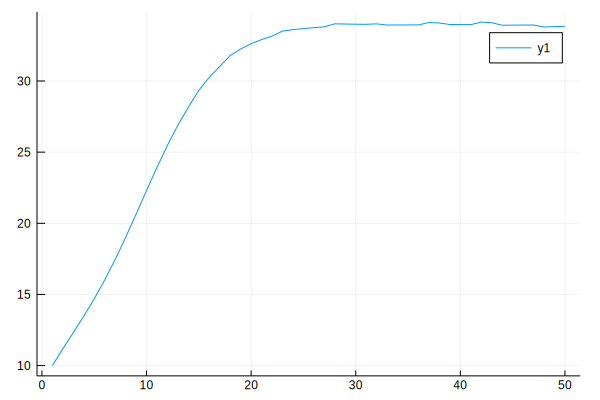

In [12]:
plot(simres2.state_vars[1][1,:])

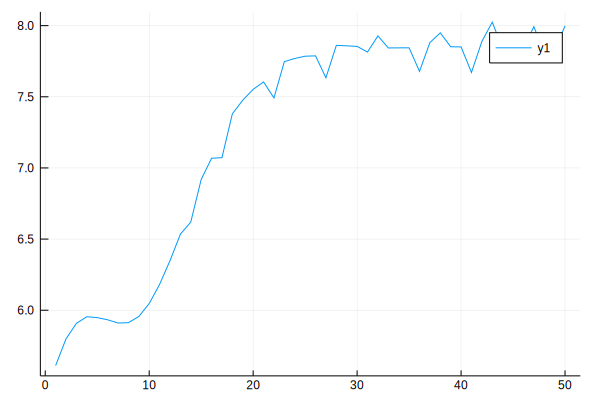

In [13]:
plot(simres2.choice_vars[1][1,:])

## Problem 4

In [14]:
include("problem4.jl")

getproblem4 (generic function with 1 method)

In [15]:
p4 = getproblem4()

p.uncertain_nodes = Array{Float64}(0,0)
uncertain_nodes = [-0.0277685, -0.0187767, -0.0109647, -0.00361183, 0.00361183, 0.0109647, 0.0187767, 0.0277685]
size(p.uncertain_nodes, 1) = 0


Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [0.7, 1.3]
    State 2: 10 nodes over [0.8853, 1.1295]
  3 choice variables
    Choice 1: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 2: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 3: bounds [0.0, 1.0e11] with initial value 0.1
  1 constraints
    Constraint 1: bounds [0.0, Inf] 
  1 uncertain parameters


In [16]:
res4 = solve(p4)

Function iteration converged after 33 iterations with max. coefficient difference of 0.0008998417886481036


Dynamic programming solution

In [17]:
# simres4 = simulate(res4, 50);